# Importaciones y carga de datos de la API

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.layouts import gridplot

# URL Historic US values
url = "https://api.covidtracking.com/v1/states/daily.csv"

# Cargar datos en DataFrame
df = pd.read_csv(url)

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

df.head()

date state  positive  probableCases   negative  pending  \
0  20210307    AK   56886.0            NaN        NaN      NaN   
1  20210307    AL  499819.0       107742.0  1931711.0      NaN   
2  20210307    AR  324818.0        69092.0  2480716.0      NaN   
3  20210307    AS       0.0            NaN     2140.0      NaN   
4  20210307    AZ  826454.0        56519.0  3073010.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1731628.0                   33.0   
1  totalTestsPeopleViral         2323788.0                  494.0   
2        totalTestsViral         2736442.0                  335.0   
3        totalTestsViral            2140.0                    NaN   
4        totalTestsViral         7908105.0                  963.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                  1293.0             NaN              NaN   
1                 45976.0             NaN           2676.0   
2                 14926.0           141.0              NaN   
3                     NaN             NaN              NaN   
4                 57907.0           273.0              NaN   

   onVentilatorCurrently  onVentilatorCumulative  recovered     lastUpdateEt  \
0                    2.0                     NaN        NaN   3/5/2021 03:59   
1                    NaN                  1515.0   295690.0   3/7/2021 11:00   
2                   65.0                  1533.0   315517.0   3/7/2021 00:00   
3                    NaN                     NaN        NaN  12/1/2020 00:00   
4                  143.0                     NaN        NaN   3/7/2021 00:00   

           dateModified  checkTimeEt    death  hospitalized  \
0  2021-03-05T03:59:00Z  03/04 22:59    305.0        1293.0   
1  2021-03-07T11:00:00Z  03/07 06:00  10148.0       45976.0   
2  2021-03-07T00:00:00Z  03/06 19:00   5319.0       14926.0   
3  2020-12-01T00:00:00Z  11/30 19:00      0.0           NaN   
4  2021-03-07T00:00:00Z  03/06 19:00  16328.0       57907.0   

   hospitalizedDischarged           dateChecked  totalTestsViral  \
0                     NaN  2021-03-05T03:59:00Z        1731628.0   
1                     NaN  2021-03-07T11:00:00Z              NaN   
2                     NaN  2021-03-07T00:00:00Z        2736442.0   
3                     NaN  2020-12-01T00:00:00Z           2140.0   
4                118932.0  2021-03-07T00:00:00Z        7908105.0   

   positiveTestsViral  negativeTestsViral  positiveCasesViral  deathConfirmed  \
0             68693.0           1660758.0                 NaN             NaN   
1                 NaN                 NaN            392077.0          7963.0   
2                 NaN           2480716.0            255726.0          4308.0   
3                 NaN                 NaN                 0.0             NaN   
4                 NaN                 NaN            769935.0         14403.0   

   deathProbable  totalTestEncountersViral  totalTestsPeopleViral  \
0            NaN                       NaN                    NaN   
1         2185.0                       NaN              2323788.0   
2         1011.0                       NaN                    NaN   
3            NaN                       NaN                    NaN   
4         1925.0                       NaN              3842945.0   

   totalTestsAntibody  positiveTestsAntibody  negativeTestsAntibody  \
0                 NaN                    NaN                    NaN   
1                 NaN                    NaN                    NaN   
2                 NaN                    NaN                    NaN   
3                 NaN                    NaN                    NaN   
4            580569.0                    NaN                    NaN   

   totalTestsPeopleAntibody  positiveTestsPeopleAntibody  \
0                       NaN                          NaN   
1                  119757.0                          NaN   
2                       NaN                 

# Pruebas y Limpieza de datos

In [2]:
print(df.dtypes)

date                             int64
state                           object
positive                       float64
probableCases                  float64
negative                       float64
pending                        float64
totalTestResultsSource          object
totalTestResults               float64
hospitalizedCurrently          float64
hospitalizedCumulative         float64
inIcuCurrently                 float64
inIcuCumulative                float64
onVentilatorCurrently          float64
onVentilatorCumulative         float64
recovered                      float64
lastUpdateEt                    object
dateModified                    object
checkTimeEt                     object
death                          float64
hospitalized                   float64
hospitalizedDischarged         float64
dateChecked                     object
totalTestsViral                float64
positiveTestsViral             float64
negativeTestsViral             float64
positiveCasesViral       

In [3]:
print(df.nunique())

date                             420
state                             56
positive                       16855
probableCases                   6329
negative                       10878
pending                          946
totalTestResultsSource             4
totalTestResults               18634
hospitalizedCurrently           3885
hospitalizedCumulative          7571
inIcuCurrently                  1642
inIcuCumulative                 2295
onVentilatorCurrently            836
onVentilatorCumulative           675
recovered                       8295
lastUpdateEt                    9502
dateModified                    9502
checkTimeEt                     9491
death                           7476
hospitalized                    7571
hospitalizedDischarged          2258
dateChecked                     9502
totalTestsViral                12519
positiveTestsViral              7852
negativeTestsViral              4365
positiveCasesViral             12307
deathConfirmed                  5377
d

Utilizamos **nunique()** para ver las columnas que tengan uno o muy pocos valores únicos y analizamos si son relevantes para el estudio.

Eliminamos columnas que no son relevantes como:

- totalTestResultsSource
- fips
- dataQualityGrade                   
- commercialScore                    
- negativeRegularScore               
- negativeScore                      
- positiveScore                      
- score                              
- grade                              

In [4]:
print((df.isnull().sum()).sort_values(ascending=False))

grade                          20780
dataQualityGrade               20780
positiveTestsPeopleAntigen     20147
negativeTestsPeopleAntibody    19808
totalTestsPeopleAntigen        19781
positiveTestsPeopleAntibody    19686
onVentilatorCumulative         19490
negativeTestsAntibody          19322
pending                        18642
totalTestsPeopleAntibody       18580
positiveTestsAntigen           18547
hospitalizedDischarged         17710
positiveTestsAntibody          17434
totalTestsAntigen              17359
inIcuCumulative                16991
totalTestsAntibody             15991
negativeTestsViral             15756
totalTestEncountersViral       15549
deathProbable                  13187
positiveTestsViral             11822
onVentilatorCurrently          11654
totalTestsPeopleViral          11583
probableCases                  11509
deathConfirmed                 11358
inIcuCurrently                  9144
recovered                       8777
hospitalized                    8398
h

Utilizamos **isnull()** para ver las columnas que tengan muchos valores faltantes (NaN) y analizamos si son relevantes para el estudio.

A las columnas ya eliminadas de nuestro estudio:

- totalTestResultsSource
- fips
- dataQualityGrade                   
- commercialScore                    
- negativeRegularScore               
- negativeScore                      
- positiveScore                      
- score                              
- grade        

Le sumamos las que superan los 15000 valores Nan de 20780 que hay en total:

- positiveTestsPeopleAntigen
- negativeTestsPeopleAntibody
- totalTestsPeopleAntigen     
- positiveTestsPeopleAntibody    
- onVentilatorCumulative         
- negativeTestsAntibody          
- pending                        
- totalTestsPeopleAntibody       
- positiveTestsAntigen           
- positiveTestsAntibody          
- totalTestsAntigen            
- totalTestsAntibody           
- totalTestEncountersViral    

Se eliminaron porque contenían demasiados valores faltantes. Estos campos, aunque relevantes en ciertos contextos, no aportaban suficiente información en la mayoría de las observaciones, lo que hacía su inclusión más perjudicial que beneficiosa para un análisis coherente y significativo.

In [5]:
# Analizamos la correlación entre columnas numéricas

num_df = df.select_dtypes(include=['number'])

corr_matrix = num_df.corr()

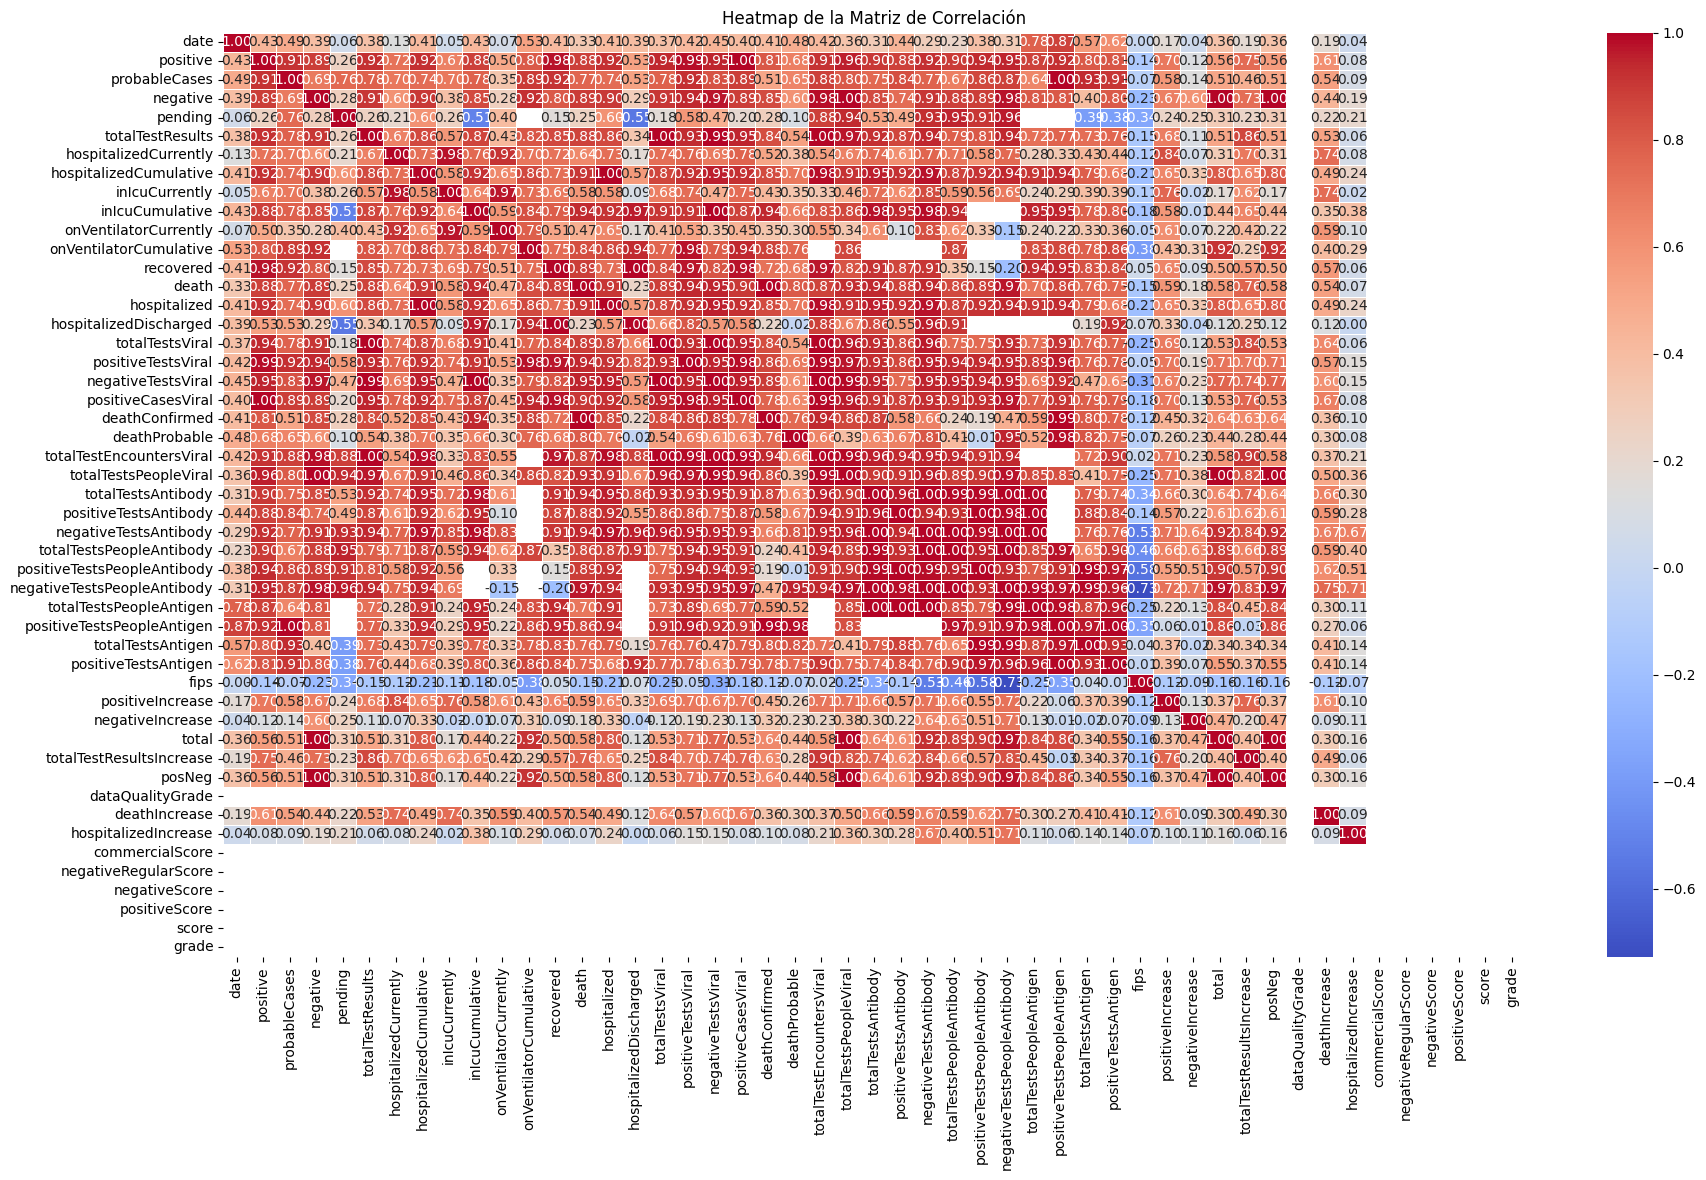

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(21, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

La correlación entre columnas se evalúa para identificar relaciones lineales fuertes que indican redundancia. Si dos o más columnas tienen una alta correlación (por ejemplo, mayor a 0.9), es posible que estén capturando la misma información, y se puede seleccionar una de ellas para representarla.

A través del análisis de la matriz de correlación, se identificó que positiveCasesViral y positive están altamente correlacionadas. Debido a que ambas columnas reflejan información similar sobre los casos positivos, se decidió conservar solo positive, que es más directa y ampliamente comprendida. De manera similar, se eliminó negativeTestsViral en favor de negative.

hospitalizedIncrease no tiene correlacion relevante con ninguna columna numerica, pero si podria ser relevante con la fecha y el estado.

Las columnas que contienen valores únicos o constantes, o aquellas que son redundantes porque su información ya está representada en otras columnas, se eliminan para simplificar el análisis.

Columnas como fips, dataQualityGrade, y commercialScore se eliminaron porque no aportaban valor añadido al análisis de la incidencia del COVID-19. Por ejemplo, fips es un código geográfico que no añade información relevante al análisis de tendencias epidemiológicas. De manera similar, dataQualityGrade y otros puntajes relacionados con la calidad de los datos se consideraron innecesarios para el propósito del análisis centrado en la evolución de casos y hospitalizaciones.

In [7]:
# Eliminamos las columnas innecesarias para seguir con el analisis
columns_to_drop = [
    'totalTestResultsSource',
    'fips',
    'dataQualityGrade',
    'commercialScore',
    'negativeRegularScore',
    'negativeScore',
    'positiveScore',
    'score',
    'grade',
    'positiveTestsPeopleAntigen',
    'negativeTestsPeopleAntibody',
    'totalTestsPeopleAntigen',
    'positiveTestsPeopleAntibody',
    'negativeTestsAntibody',
    'pending',
    'totalTestsPeopleAntibody',
    'positiveTestsAntigen',
    'positiveTestsAntibody',
    'totalTestsAntigen',
    'totalTestsAntibody',
    'totalTestEncountersViral',
    'positiveCasesViral',
    'hospitalized',
    'totalTestResultsIncrease',
    'hash',
    'totalTestsViral',
    'positiveTestsViral',
    'negativeTestsViral',
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Análisis de correlación de los datos restantes

In [8]:
# Analizamos la correlación entre columnas numéricas

num_df = df.select_dtypes(include=['number'])

corr_matrix = num_df.corr()

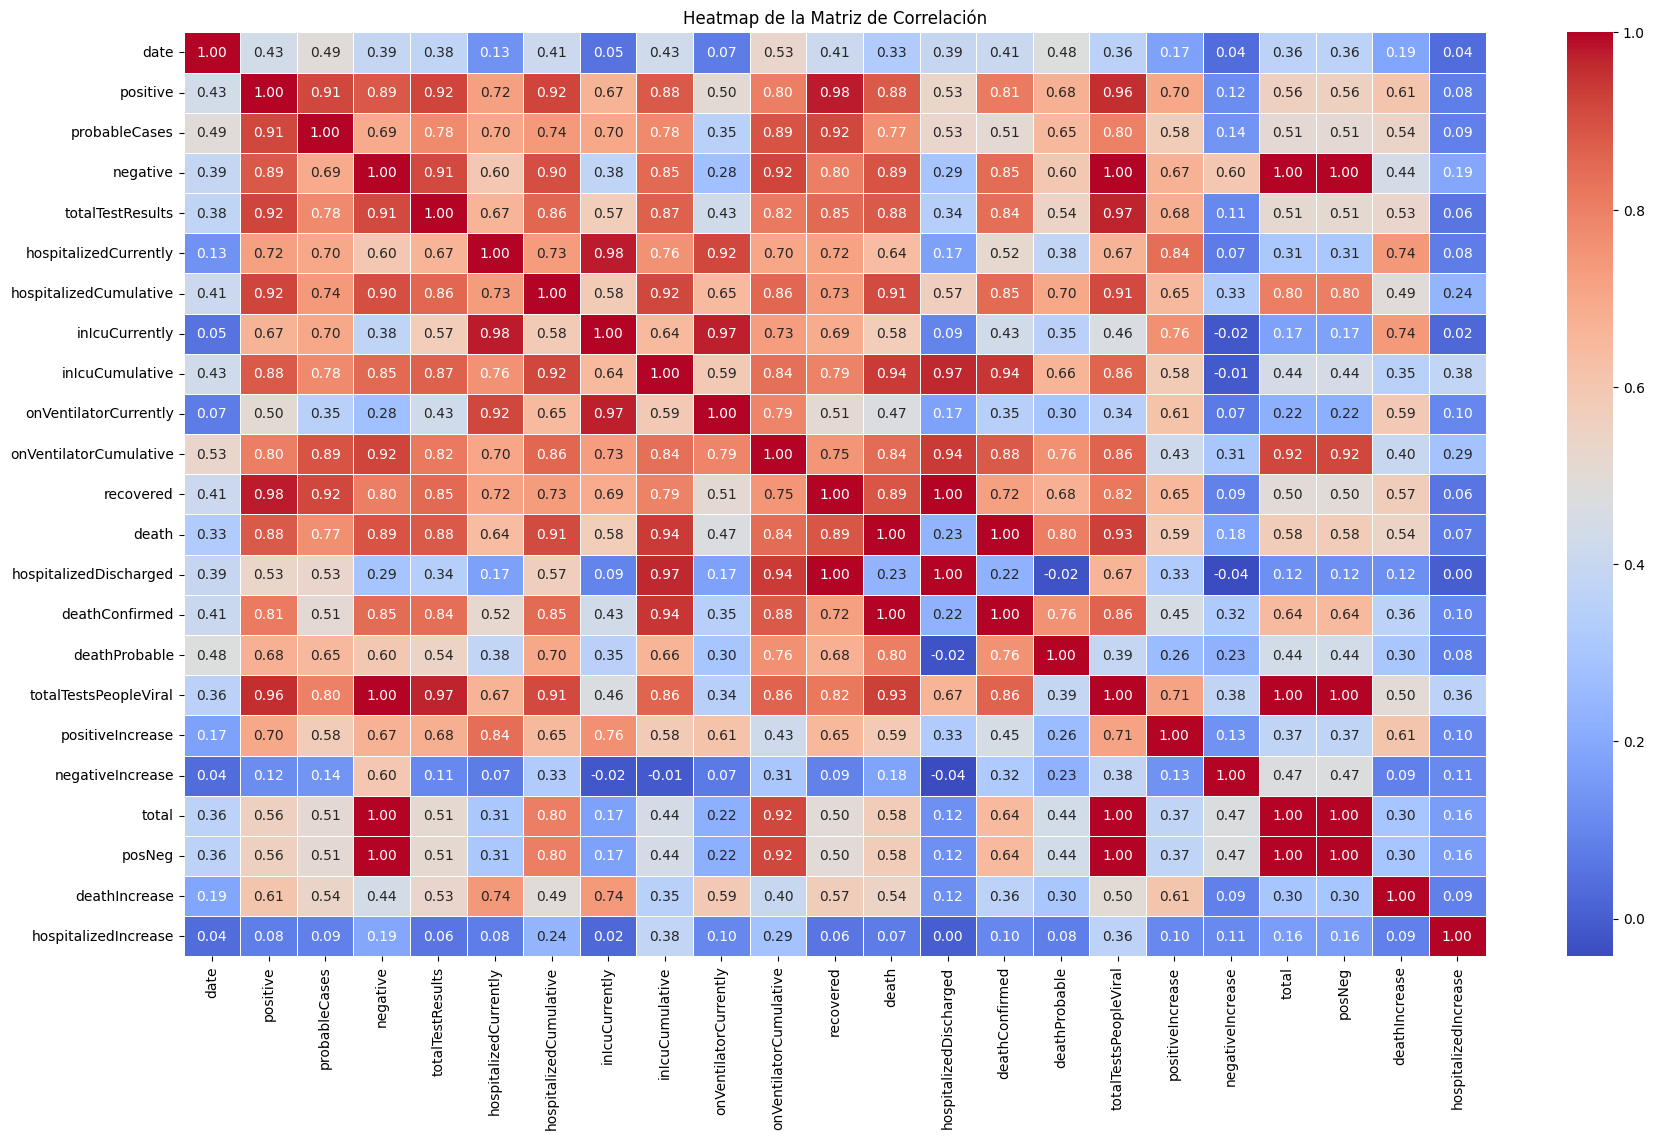

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(21, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

# Análisis y visualización  por Estado y Fecha

Gráficas de visualización casos positivos, negativos, hospitalizaciones, muertes y recuperaciones a lo largo del tiempo, desglosado por estado.

**Evolución de Casos Positivos y Negativos por Estado**

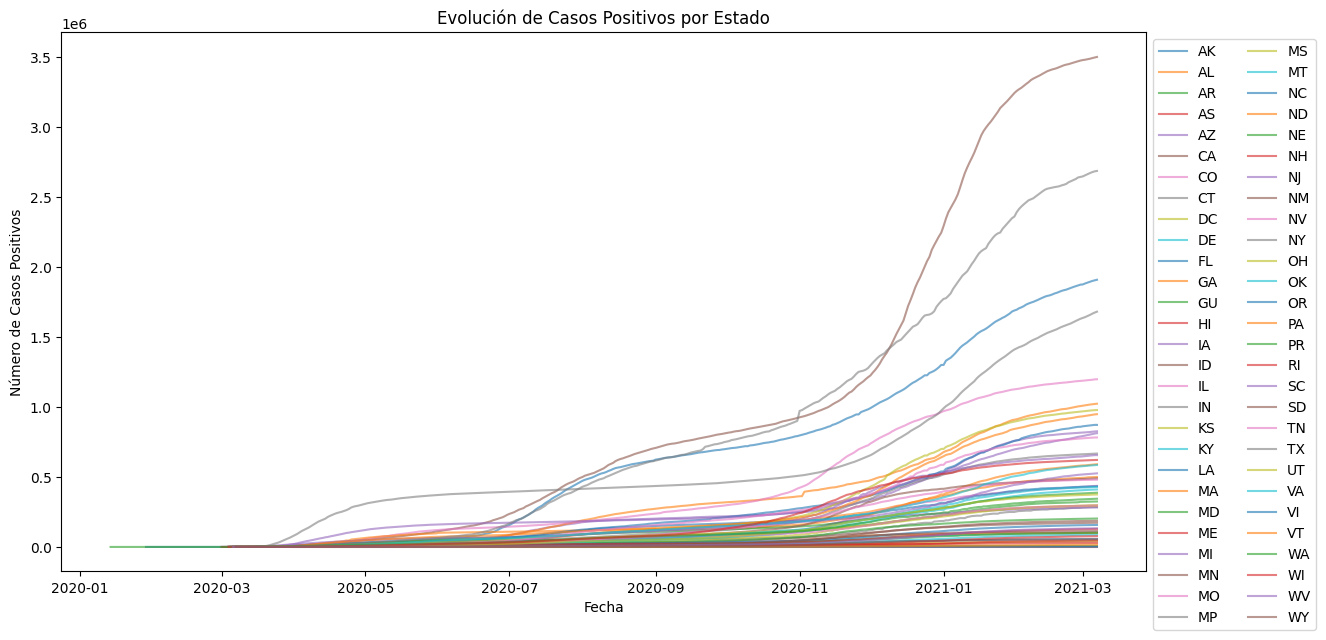

In [21]:
# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Gráfico de evolución de casos positivos por estado
plt.figure(figsize=(14, 7))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.plot(state_data['date'], state_data['positive'], label=f'{state}', alpha=0.6)

plt.title('Evolución de Casos Positivos por Estado')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos Positivos')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()

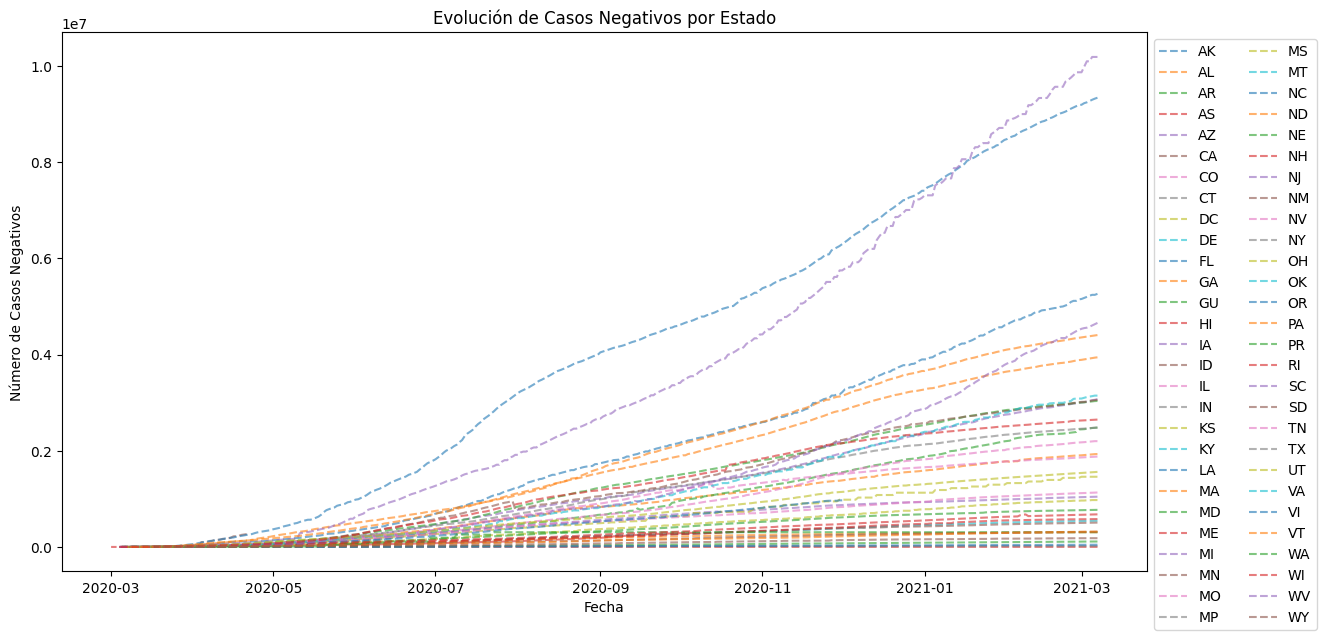

In [22]:
# Gráfico de evolución de casos negativos por estado
plt.figure(figsize=(14, 7))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.plot(state_data['date'], state_data['negative'], label=f'{state}', alpha=0.6, linestyle='--')

plt.title('Evolución de Casos Negativos por Estado')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos Negativos')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()

 **Evolución de Hospitalizaciones por Estado**

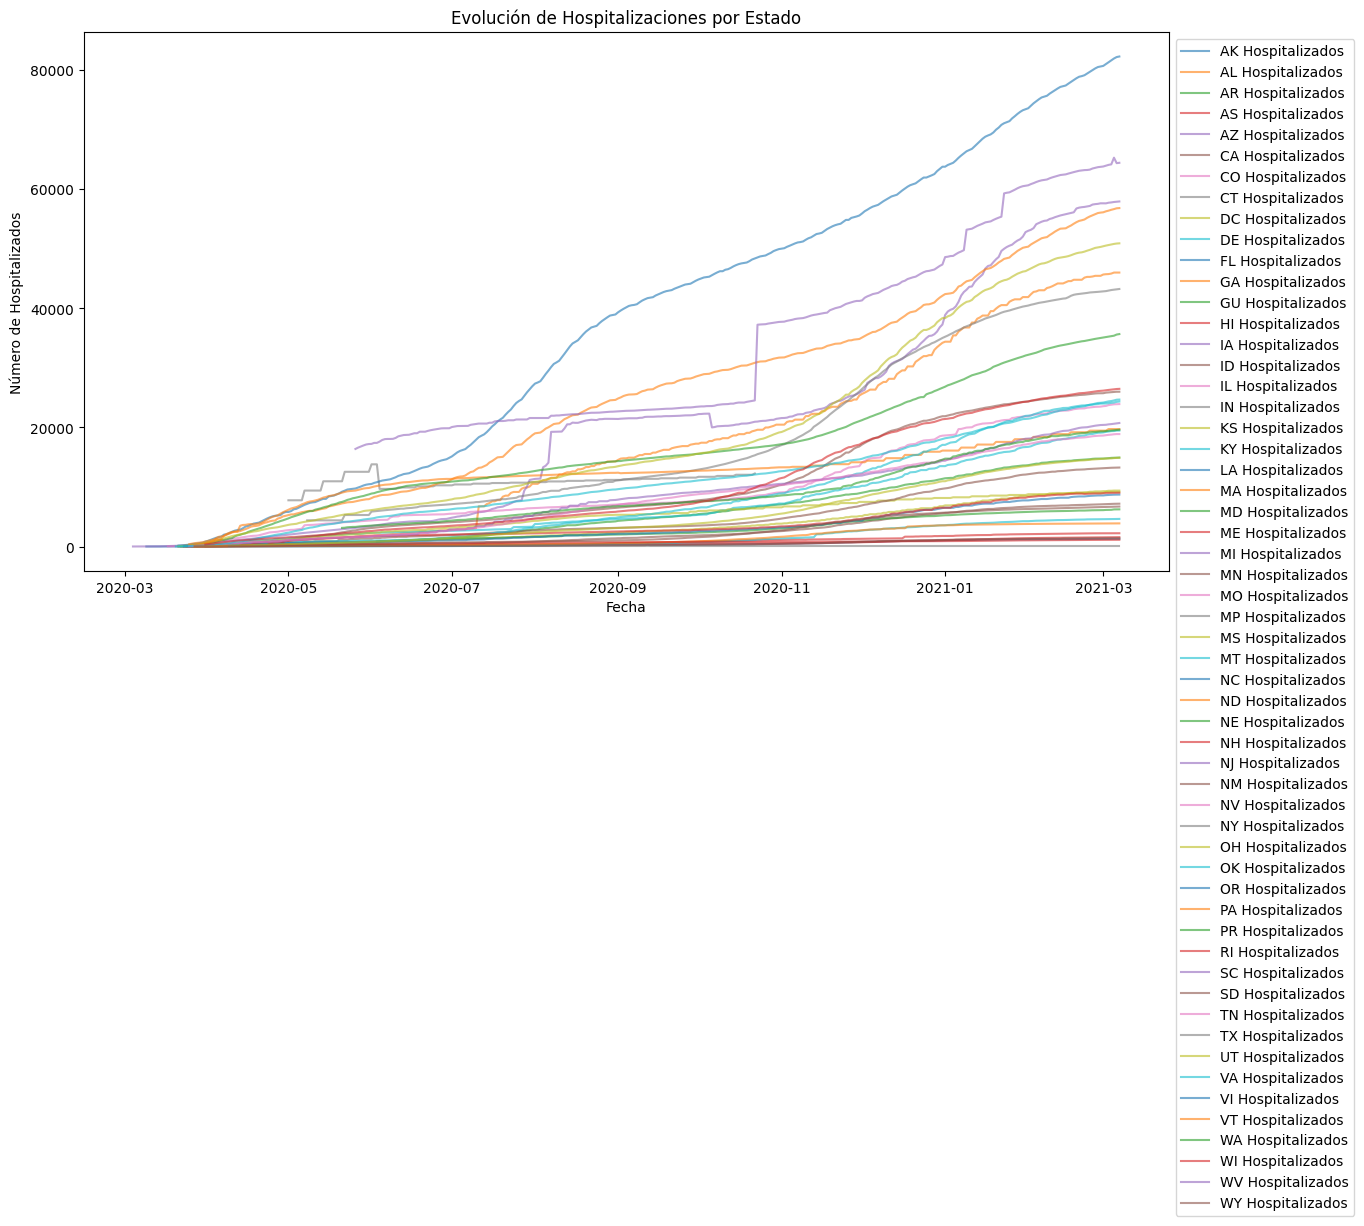

In [11]:
# Gráfico de evolución de hospitalizaciones por estado
plt.figure(figsize=(14, 7))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.plot(state_data['date'], state_data['hospitalizedCumulative'], label=f'{state} Hospitalizados', alpha=0.6)

plt.title('Evolución de Hospitalizaciones por Estado')
plt.xlabel('Fecha')
plt.ylabel('Número de Hospitalizados')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

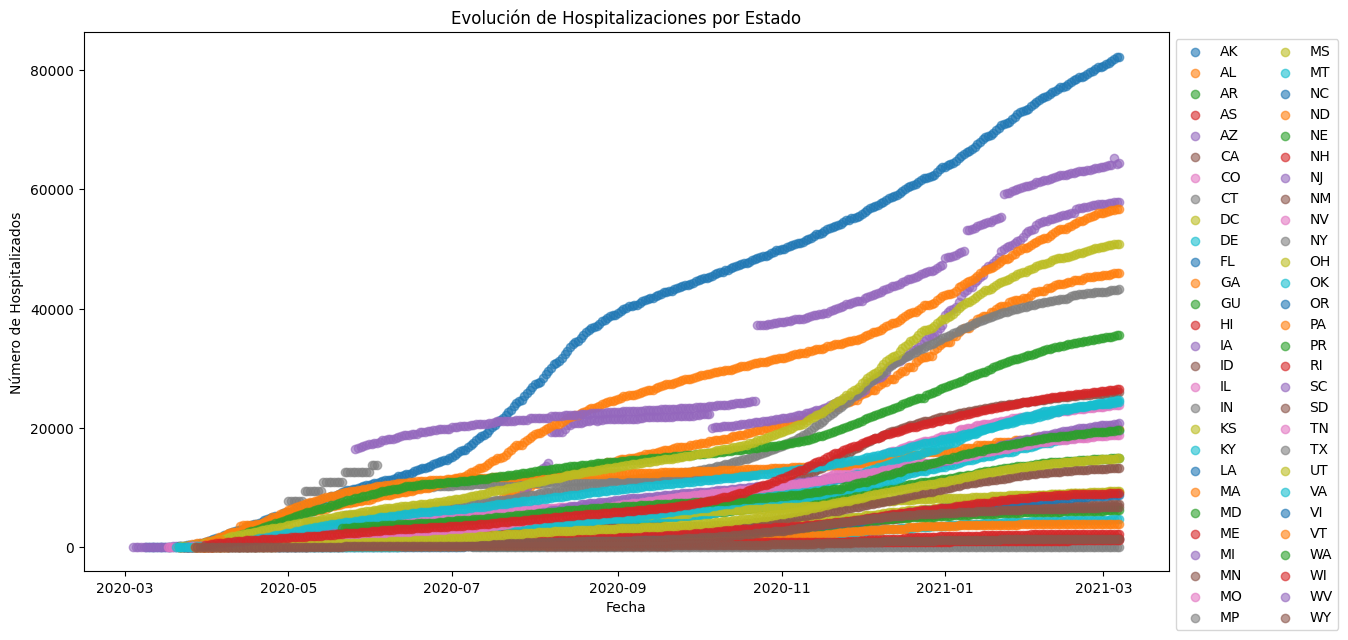

In [23]:
# Gráfico de evolución de hospitalizaciones por estado usando scatter plot
plt.figure(figsize=(14, 7))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.scatter(state_data['date'], state_data['hospitalizedCumulative'], label=f'{state}', alpha=0.6)

plt.title('Evolución de Hospitalizaciones por Estado')
plt.xlabel('Fecha')
plt.ylabel('Número de Hospitalizados')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()

 **Evolución de Muertes por Estado**

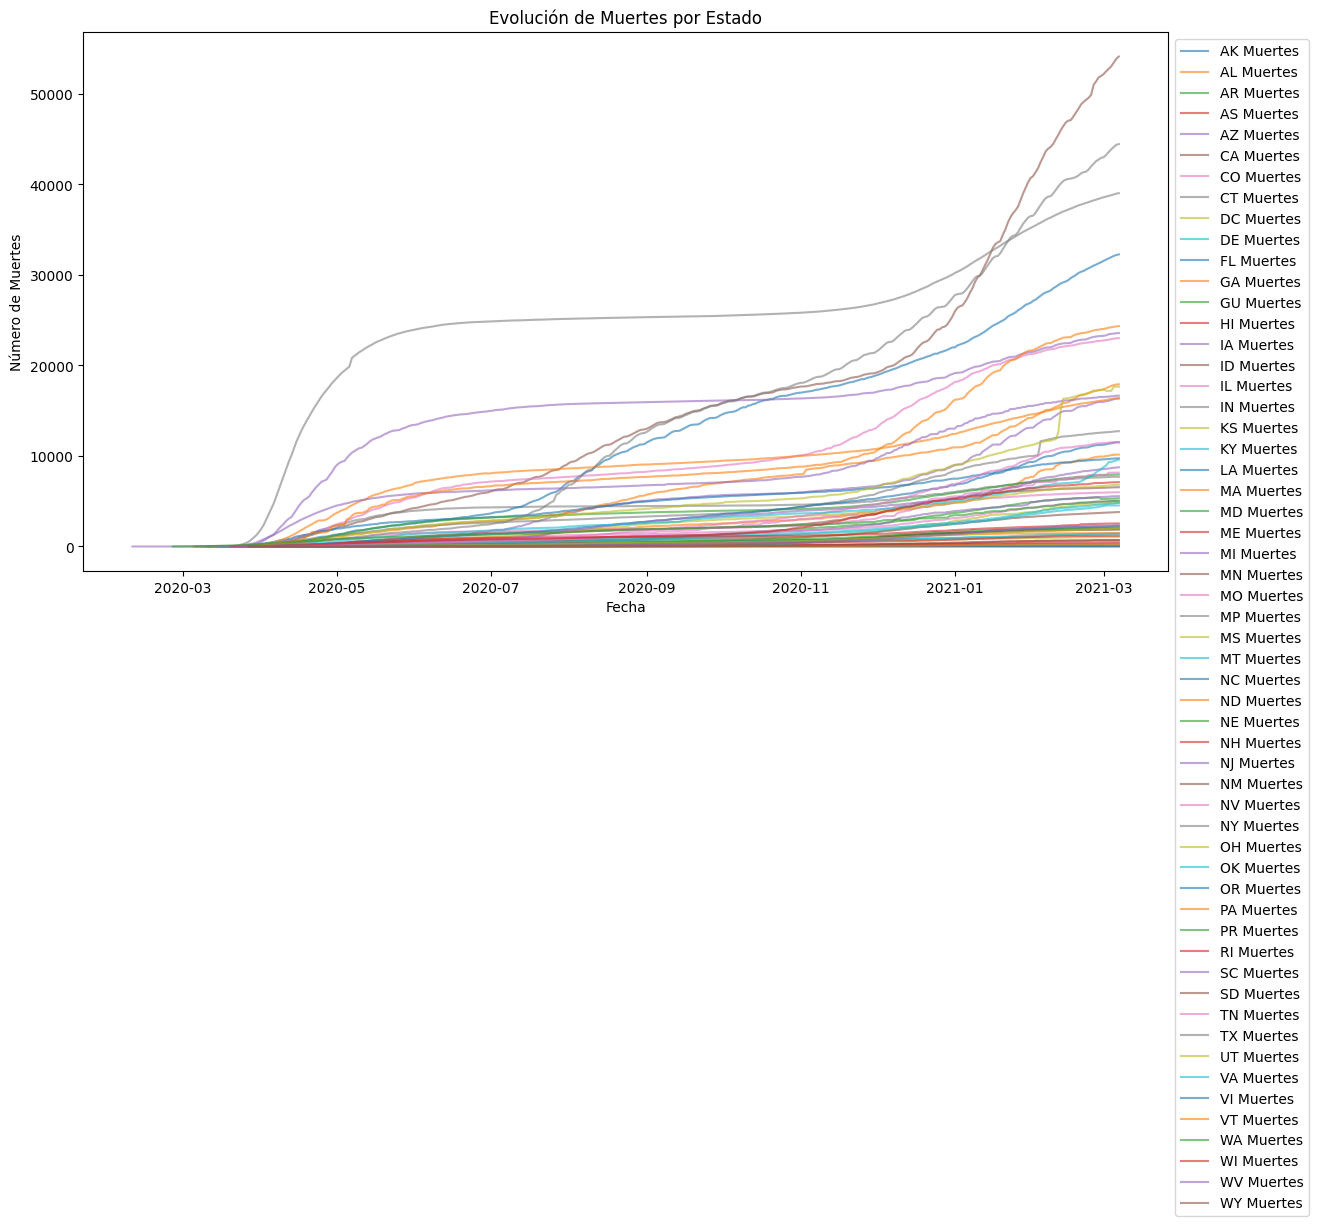

In [12]:
# Gráfico de evolución de muertes por estado
plt.figure(figsize=(14, 7))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.plot(state_data['date'], state_data['death'], label=f'{state} Muertes', alpha=0.6)

plt.title('Evolución de Muertes por Estado')
plt.xlabel('Fecha')
plt.ylabel('Número de Muertes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

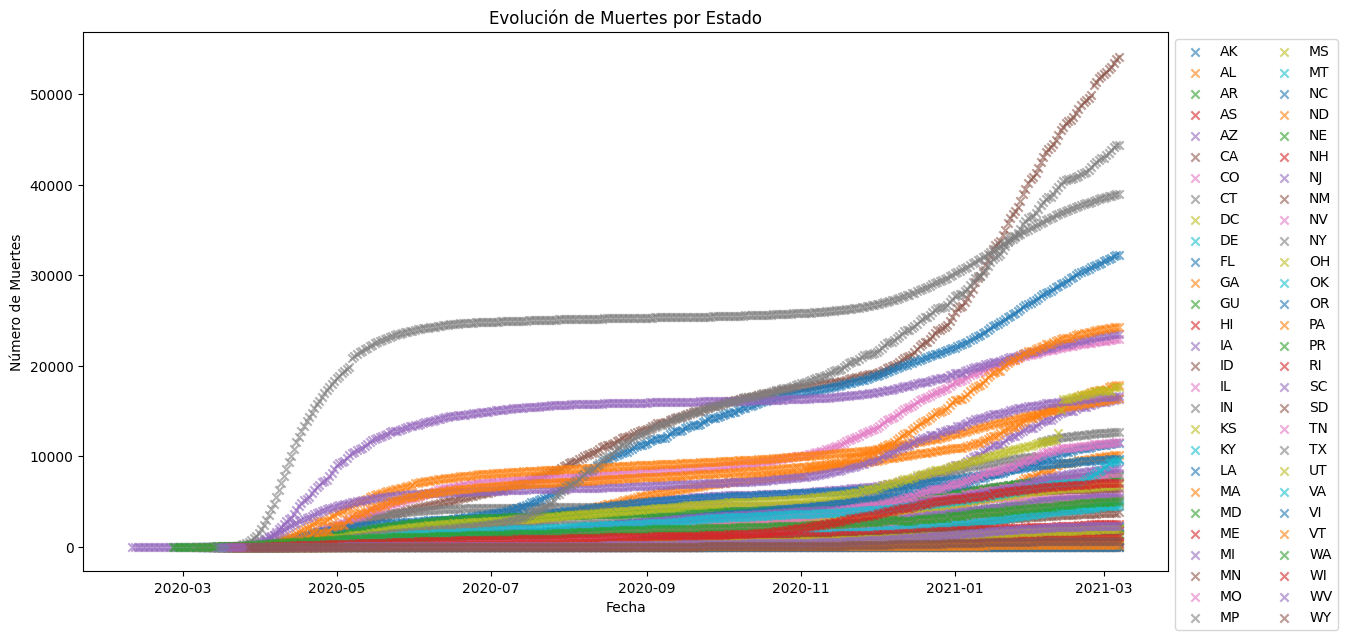

In [24]:
# Gráfico de evolución de muertes por estado usando scatter plot
plt.figure(figsize=(14, 7))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.scatter(state_data['date'], state_data['death'], label=f'{state}', alpha=0.6, marker='x')

plt.title('Evolución de Muertes por Estado')
plt.xlabel('Fecha')
plt.ylabel('Número de Muertes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.show()

**Evolución de Recuperaciones por Estado**

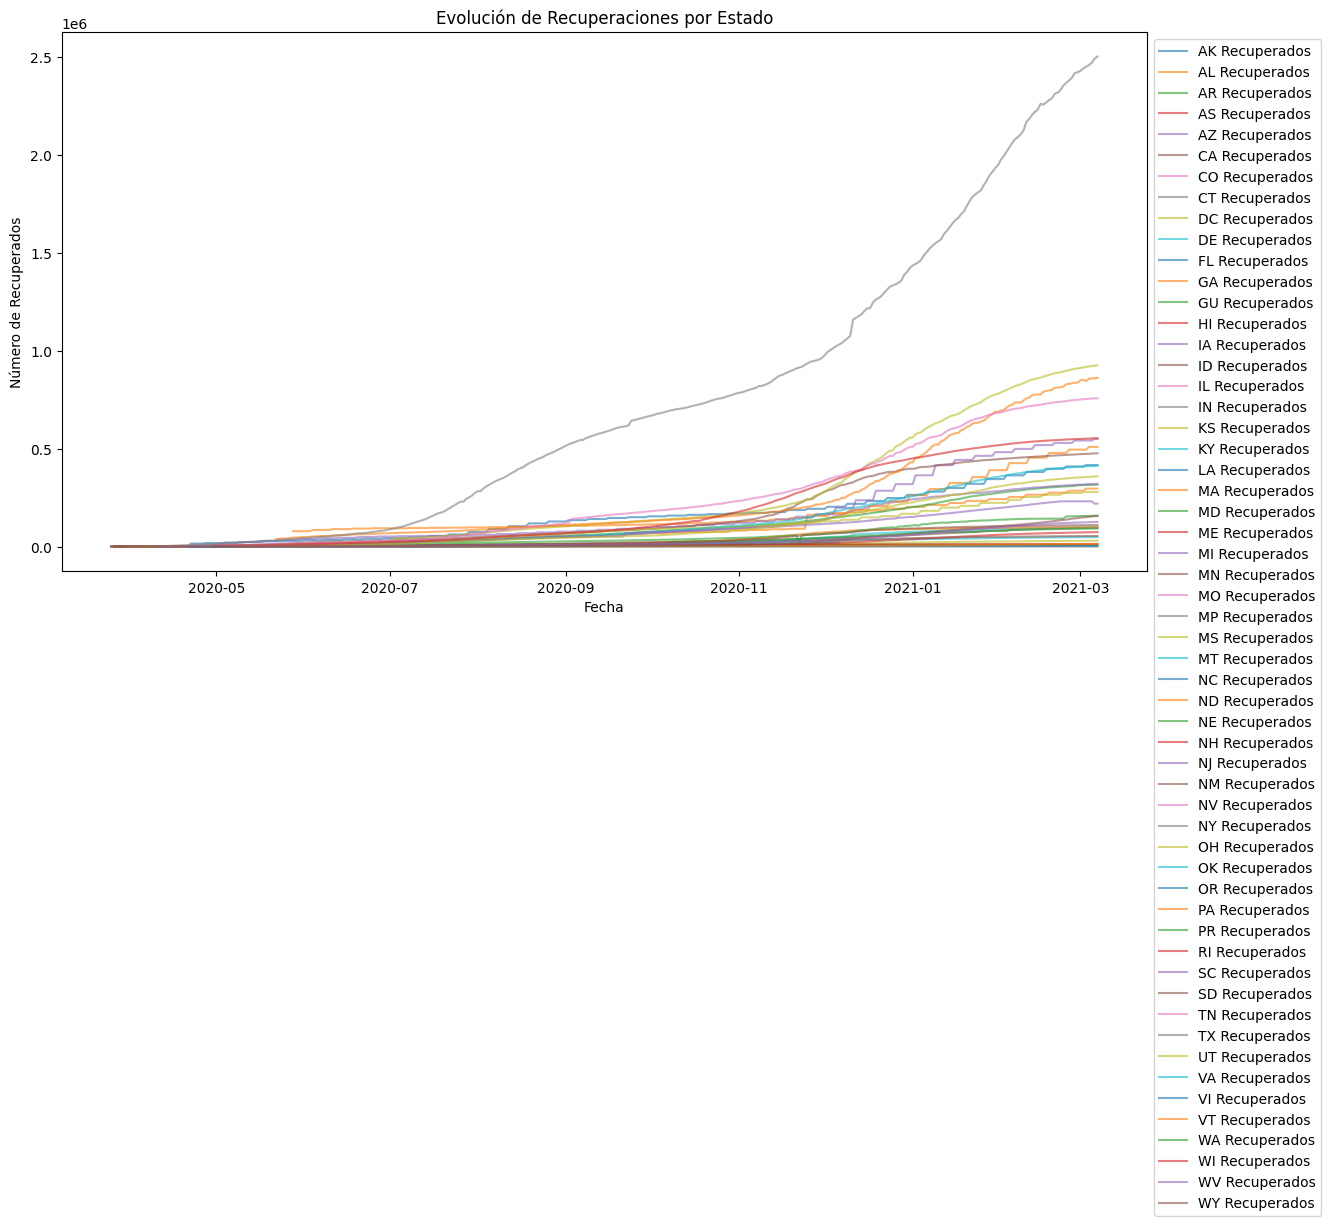

In [13]:
# Gráfico de evolución de recuperaciones por estado
plt.figure(figsize=(14, 7))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.plot(state_data['date'], state_data['recovered'], label=f'{state} Recuperados', alpha=0.6)

plt.title('Evolución de Recuperaciones por Estado')
plt.xlabel('Fecha')
plt.ylabel('Número de Recuperados')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**Análisis del Inicio de la Pandemia en Diferentes Estados**

Analizamos el momento en que se reportaron los primeros casos positivos en cada estado.

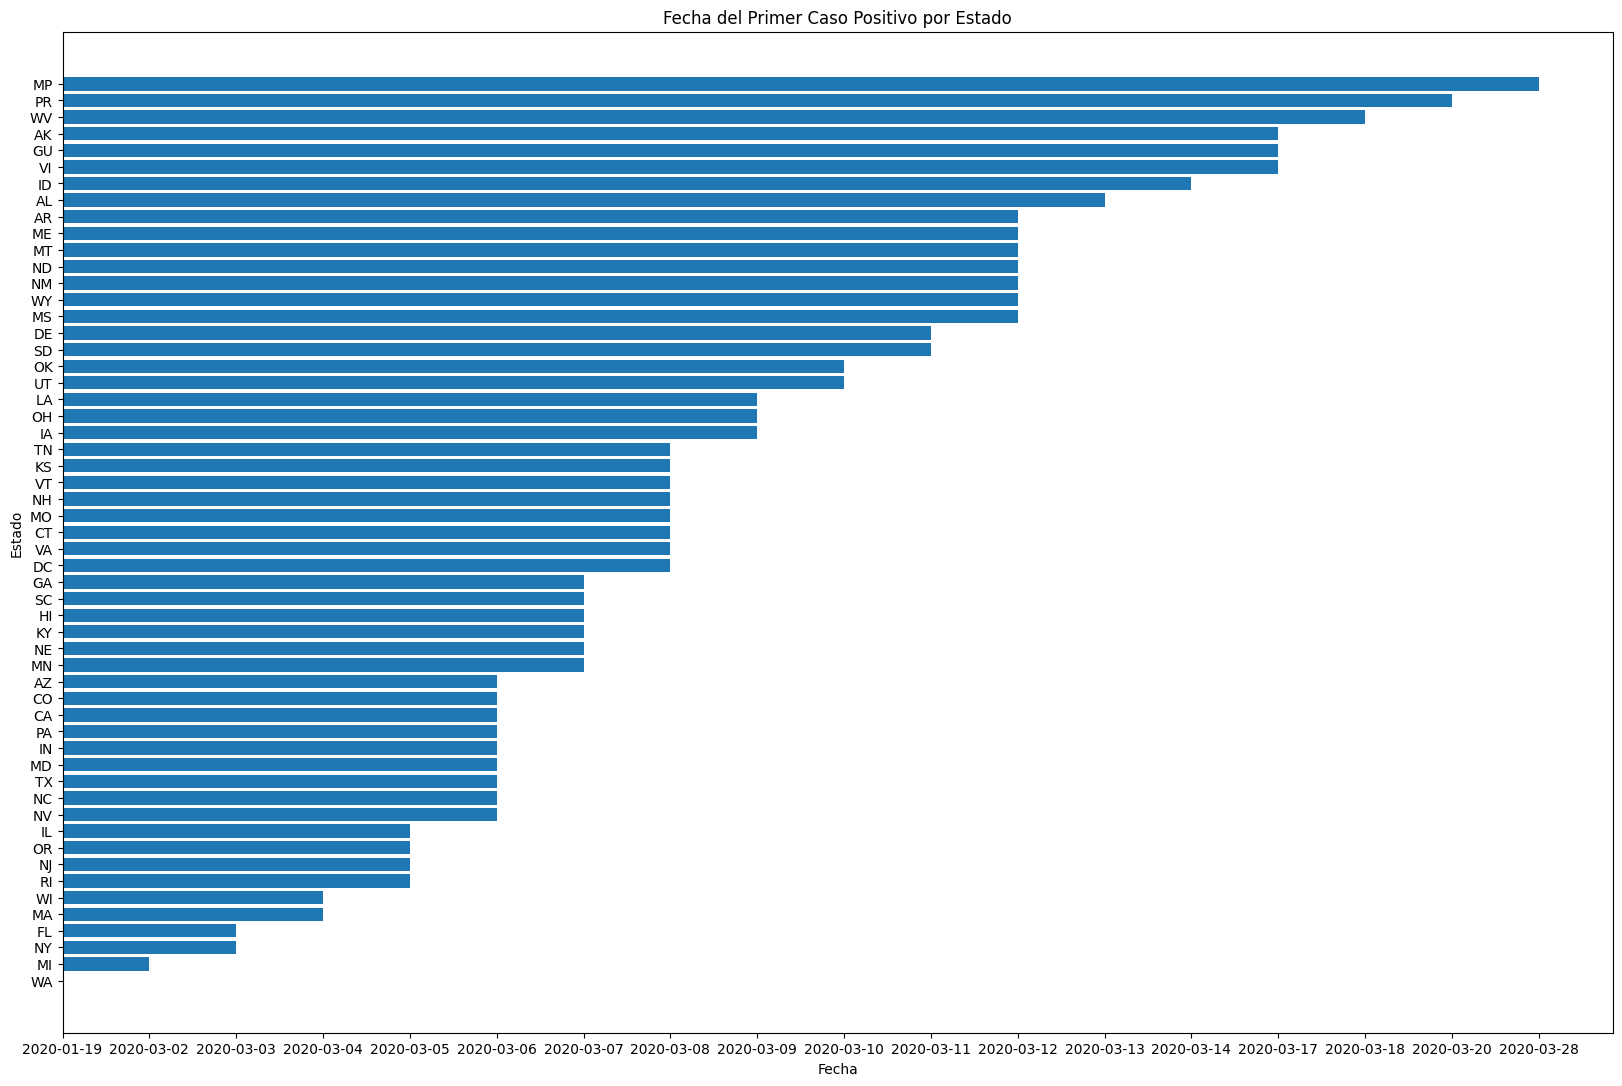

In [26]:
# Filtrar el primer día con un caso positivo en cada estado
first_cases = df[df['positiveIncrease'] > 0].groupby('state')['date'].min().reset_index()
first_cases.sort_values(by='date', inplace=True)

plt.figure(figsize=(20, 13))
plt.barh(first_cases['state'], first_cases['date'].astype(str))
plt.xlabel('Fecha')
plt.ylabel('Estado')
plt.title('Fecha del Primer Caso Positivo por Estado')
plt.show()

**Visualización Interactiva con Bokeh**

In [27]:
output_notebook()

# Seleccionar un estado para visualizar
state = 'CA'
state_data = df[df['state'] == state]

# Crear un gráfico interactivo
p = figure(x_axis_type="datetime", title=f'Evolución de Casos Positivos y Muertes en {state}')
p.line(state_data['date'], state_data['positive'], color='blue', legend_label='Positivos')
p.line(state_data['date'], state_data['death'], color='red', legend_label='Muertes')

p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Número de Casos'
p.legend.location = "top_left"

hover = HoverTool()
hover.tooltips = [
    ("Fecha", "@x{%F}"),
    ("Casos Positivos", "@y{0,0}")
]
hover.formatters = {'@x': 'datetime'}
p.add_tools(hover)

show(p)

**Gráfico del Total de Muertes por Estado**

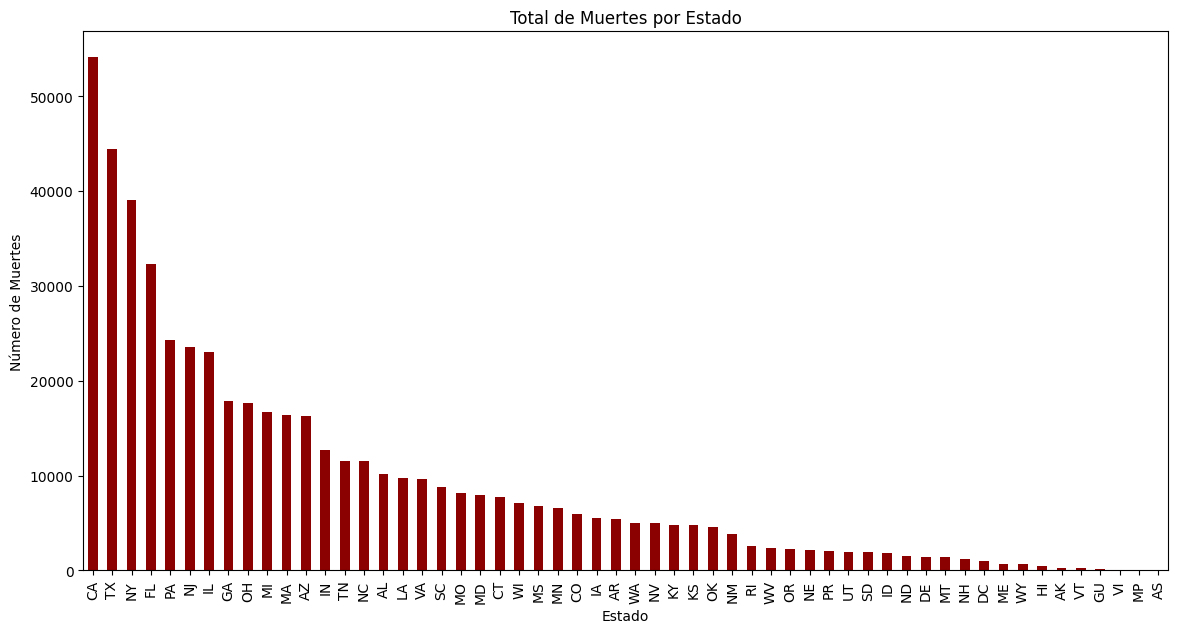

In [28]:
# Agrupamos por estado y sumamos las muertes
state_deaths = df.groupby('state')['death'].max().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
state_deaths.plot(kind='bar', color='darkred')
plt.title('Total de Muertes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Muertes')
plt.show()


**Mapas Interactivos con Fecha**

Este gráfico permitirá ver cómo los **casos positivos** evolucionan a lo largo del tiempo en los diferentes estados de EE. UU. y es especialmente útil para entender la propagación del virus

In [31]:
import plotly.express as px

# Filtramos los datos a partir de una fecha específica
cumulative_df = df[df['date'] >= '2020-02-01']

fig = px.choropleth(cumulative_df,
                    locations="state",
                    color="positive",
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=cumulative_df["date"].dt.strftime('%Y-%m-%d'),
                    color_continuous_scale='Reds',
                    range_color=[0,600000]
                   )

fig.update_layout(title_text='Evolución de Casos Positivos de COVID-19 en USA')
fig.show()


Evolución del Total de Hospitalizados:

In [33]:
import plotly.express as px

# Gráfico de coropletas para el total de hospitalizados
fig_hospitalized = px.choropleth(cumulative_df,
                                 locations="state",
                                 color="hospitalizedCumulative",
                                 locationmode="USA-states",
                                 scope="usa",
                                 animation_frame=cumulative_df["date"].dt.strftime('%Y-%m-%d'),
                                 color_continuous_scale='Purples',
                                 range_color=[0, max(cumulative_df['hospitalizedCumulative'].dropna())]
                                )

fig_hospitalized.update_layout(title_text='Evolución del Total de Hospitalizaciones por COVID-19 en USA')
fig_hospitalized.show()

Evolución del total de muertes:

In [32]:
import plotly.express as px

# Filtramos los datos a partir de una fecha específica
cumulative_df = df[df['date'] >= '2020-02-01']

# Gráfico de coropletas para el total de muertes
fig_deaths = px.choropleth(cumulative_df,
                           locations="state",
                           color="death",
                           locationmode="USA-states",
                           scope="usa",
                           animation_frame=cumulative_df["date"].dt.strftime('%Y-%m-%d'),
                           color_continuous_scale='Blues',
                           range_color=[0, max(cumulative_df['death'].dropna())]
                          )

fig_deaths.update_layout(title_text='Evolución del Total de Muertes por COVID-19 en USA')
fig_deaths.show()
